In [49]:
import pandas as pd
import numpy as np
from datetime import datetime
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
import statsmodels.formula.api as smf
import matplotlib.pyplot as plt
import seaborn as sns
from itertools import islice, cycle

In [51]:
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

In [18]:
#8. Does weather have any effect on headway or on-time performance? 
#To help answer this question, the file bna_weather.csv contains historical
#weather data recorded at Nashville International Airport. 

In [19]:
bna_weather = pd.read_csv('bna_weather.csv')
bna_weather.head(2)

,STATION,NAME,DATE,AWND,PGTM,PRCP,SNOW,SNWD,TAVG,TMAX,TMIN,WDF2,WDF5,WSF2,WSF5,WT01,WT02,WT03,WT08
0,USW00013897,"NASHVILLE INTERNATIONAL AIRPORT, TN US",2023-08-01,6.49,NaN,0.0,0.0,0.0,80,89,70,50,10,13.0,21.0,NaN,NaN,NaN,NaN
1,USW00013897,"NASHVILLE INTERNATIONAL AIRPORT, TN US",2023-08-02,2.91,NaN,0.0,0.0,0.0,77,86,65,150,180,8.1,12.1,NaN,NaN,NaN,NaN


In [20]:
#Columns
    ##AWND=? average wind?
    ##PGTM=? (doesn't matter? appears to be zero)
    ##PRCP=precipitation
    ##SNOW=snow
    ##TAVG=temp average
    ##TMAX=Temp max
    ##=TMIN=Temp min

<Axes: >

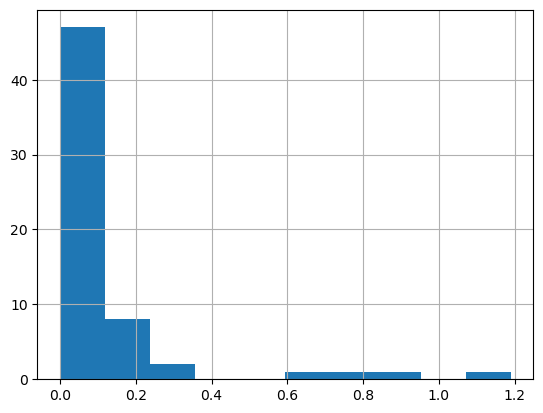

In [21]:
bna_weather['PRCP'].hist()

In [22]:
#potential solution
#aggregate adherence and HWDY_DEV by day, then merge, (potentially on date...)
#then look for correlations between TAVG, PRCP, 

In [35]:
df_hw_w_extra_columns = pd.read_csv('df_hw_w_extra_columns.csv', index_col=[0])

In [37]:
df_hw_w_extra_columns.head(2)

,CALENDAR_ID,SERVICE_ABBR,ADHERENCE_ID,DATE,ROUTE_ABBR,BLOCK_ABBR,OPERATOR,TRIP_ID,OVERLOAD_ID,ROUTE_DIRECTION_NAME,...,PERC_HDWY,FIRST_STOP_HDWY,DOWNSTREAM_HDWY,FS_HDWY,DELTA_HDWY,FIRST_STOP_ADHERENCE,FS_ADHERENCE,DOWNSTREAM_ADHERENCE,FIRST_STOP_HDWY_DEV,DOWNSTREAM_HDWY_DEV
0,120230801,1,99457890,2023-08-01,22,2200,1040,345104,0,TO DOWNTOWN,...,NaN,0.0,0.0,0.0,NaN,-2.133333,0.766667,0.00,NaN,0.0
1,120230801,1,99457891,2023-08-01,22,2200,1040,345104,0,TO DOWNTOWN,...,NaN,0.0,NaN,0.0,NaN,0.000000,0.766667,-2.45,0.0,NaN


In [47]:
weather_and_wego.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 350328 entries, 0 to 350327
Data columns (total 60 columns):
 #   Column                     Non-Null Count   Dtype  
---  ------                     --------------   -----  
 0   CALENDAR_ID                350328 non-null  int64  
 1   SERVICE_ABBR               350328 non-null  int64  
 2   ADHERENCE_ID               350328 non-null  int64  
 3   DATE                       350328 non-null  object 
 4   ROUTE_ABBR                 350328 non-null  int64  
 5   BLOCK_ABBR                 350328 non-null  int64  
 6   OPERATOR                   350328 non-null  int64  
 7   TRIP_ID                    350328 non-null  int64  
 8   OVERLOAD_ID                350328 non-null  int64  
 9   ROUTE_DIRECTION_NAME       350328 non-null  object 
 10  TIME_POINT_ABBR            350328 non-null  object 
 11  ROUTE_STOP_SEQUENCE        350317 non-null  float64
 12  TRIP_EDGE                  350328 non-null  int64  
 13  LATITUDE                   35

In [44]:
#see if you can merge on datatime.  Doubt it but try anyway.
weather_and_wego = df_hw_w_extra_columns.merge(bna_weather, how="outer")
weather_and_wego.head(2)

,CALENDAR_ID,SERVICE_ABBR,ADHERENCE_ID,DATE,ROUTE_ABBR,BLOCK_ABBR,OPERATOR,TRIP_ID,OVERLOAD_ID,ROUTE_DIRECTION_NAME,...,TMAX,TMIN,WDF2,WDF5,WSF2,WSF5,WT01,WT02,WT03,WT08
0,120230801,1,99457890,2023-08-01,22,2200,1040,345104,0,TO DOWNTOWN,...,89,70,50,10,13.0,21.0,NaN,NaN,NaN,NaN
1,120230801,1,99457891,2023-08-01,22,2200,1040,345104,0,TO DOWNTOWN,...,89,70,50,10,13.0,21.0,NaN,NaN,NaN,NaN


In [45]:
weather_and_wego['TRIP_CALENDAR_ID'] = weather_and_wego['TRIP_ID'].astype(str) + "_" + weather_and_wego['CALENDAR_ID'].astype(str)
#df_hw_copy_2['TRIP_CALENDAR_ID'] = df_hw_copy_2['TRIP_ID'].astype(str) + "_" + df_hw_copy_2['CALENDAR_ID'].astype(str)

In [63]:
weather_and_wego_2 = weather_and_wego[(weather_and_wego['ADHERENCE'] > -50) & (weather_and_wego['DOWNSTREAM_ADHERENCE'] > -50 )]

In [53]:
weather_and_wego['MEAN_ADHERENCE'] = weather_and_wego.groupby('TRIP_CALENDAR_ID')['ADHERENCE'].mean()
weather_and_wego.loc[5000:5002]

,CALENDAR_ID,SERVICE_ABBR,ADHERENCE_ID,DATE,ROUTE_ABBR,BLOCK_ABBR,OPERATOR,TRIP_ID,OVERLOAD_ID,ROUTE_DIRECTION_NAME,TIME_POINT_ABBR,ROUTE_STOP_SEQUENCE,TRIP_EDGE,LATITUDE,LONGITUDE,SCHEDULED_TIME,ACTUAL_ARRIVAL_TIME,ACTUAL_DEPARTURE_TIME,ADHERENCE,SCHEDULED_HDWY,ACTUAL_HDWY,HDWY_DEV,ADJUSTED_EARLY_COUNT,ADJUSTED_LATE_COUNT,ADJUSTED_ONTIME_COUNT,STOP_CANCELLED,PREV_SCHED_STOP_CANCELLED,IS_RELIEF,BLOCK_STOP_ORDER,DWELL_IN_MINS,PERC_HDWY,FIRST_STOP_HDWY,DOWNSTREAM_HDWY,FS_HDWY,DELTA_HDWY,FIRST_STOP_ADHERENCE,FS_ADHERENCE,DOWNSTREAM_ADHERENCE,FIRST_STOP_HDWY_DEV,DOWNSTREAM_HDWY_DEV,STATION,NAME,AWND,PGTM,PRCP,SNOW,SNWD,TAVG,TMAX,TMIN,WDF2,WDF5,WSF2,WSF5,WT01,WT02,WT03,WT08,TRIP_CALENDAR_ID,MEAN_ADHERENCE
5000,120230801,1,99464096,2023-08-01,56,5600,2374,347902,0,TO DOWNTOWN,GXMADISO,10.0,0,36.257412,-86.714068,04:40:00,04:40:54,04:40:54,-0.900000,NaN,NaN,NaN,0,0,1,0,0.0,0,11,0.0,NaN,0.0,NaN,0.0,NaN,0.0,-0.233332,-0.900000,0.0,NaN,USW00013897,"NASHVILLE INTERNATIONAL AIRPORT, TN US",6.49,NaN,0.0,0.0,0.0,80,89,70,50,10,13.0,21.0,NaN,NaN,NaN,NaN,347902_120230801,NaN
5001,120230801,1,99464097,2023-08-01,56,5600,2374,347902,0,TO DOWNTOWN,GXGRNFLD,9.0,0,36.210362,-86.733625,04:49:00,04:49:26,04:49:26,-0.433333,NaN,NaN,NaN,0,0,1,0,0.0,0,20,0.0,NaN,0.0,NaN,0.0,NaN,0.0,-0.233332,-0.433333,0.0,NaN,USW00013897,"NASHVILLE INTERNATIONAL AIRPORT, TN US",6.49,NaN,0.0,0.0,0.0,80,89,70,50,10,13.0,21.0,NaN,NaN,NaN,NaN,347902_120230801,NaN
5002,120230801,1,99464098,2023-08-01,56,5600,2374,347902,0,TO DOWNTOWN,GXFIVEPT,8.0,0,36.179753,-86.750216,04:55:00,04:56:19,04:56:19,-1.316666,NaN,NaN,NaN,0,0,1,0,0.0,0,29,0.0,NaN,0.0,NaN,0.0,NaN,0.0,-0.233332,-1.316666,0.0,NaN,USW00013897,"NASHVILLE INTERNATIONAL AIRPORT, TN US",6.49,NaN,0.0,0.0,0.0,80,89,70,50,10,13.0,21.0,NaN,NaN,NaN,NaN,347902_120230801,NaN


In [64]:
glm = smf.glm('ADHERENCE ~ PRCP', data = weather_and_wego_2).fit()
glm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              ADHERENCE   No. Observations:               338411
Model:                            GLM   Df Residuals:                   338409
Model Family:                Gaussian   Df Model:                            1
Link Function:               Identity   Scale:                          26.089
Method:                          IRLS   Log-Likelihood:            -1.0320e+06
Date:                Fri, 03 Nov 2023   Deviance:                   8.8287e+06
Time:                        19:40:03   Pearson chi2:                 8.83e+06
No. Iterations:                     3   Pseudo R-squ. (CS):          0.0001421
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -3.0414      0.009   -321.423      0.000      -3.060      -3.023
PRCP          -0.2643      0.038     -6.934      0.000      -0.339      -0.190
==============================================================================
"""

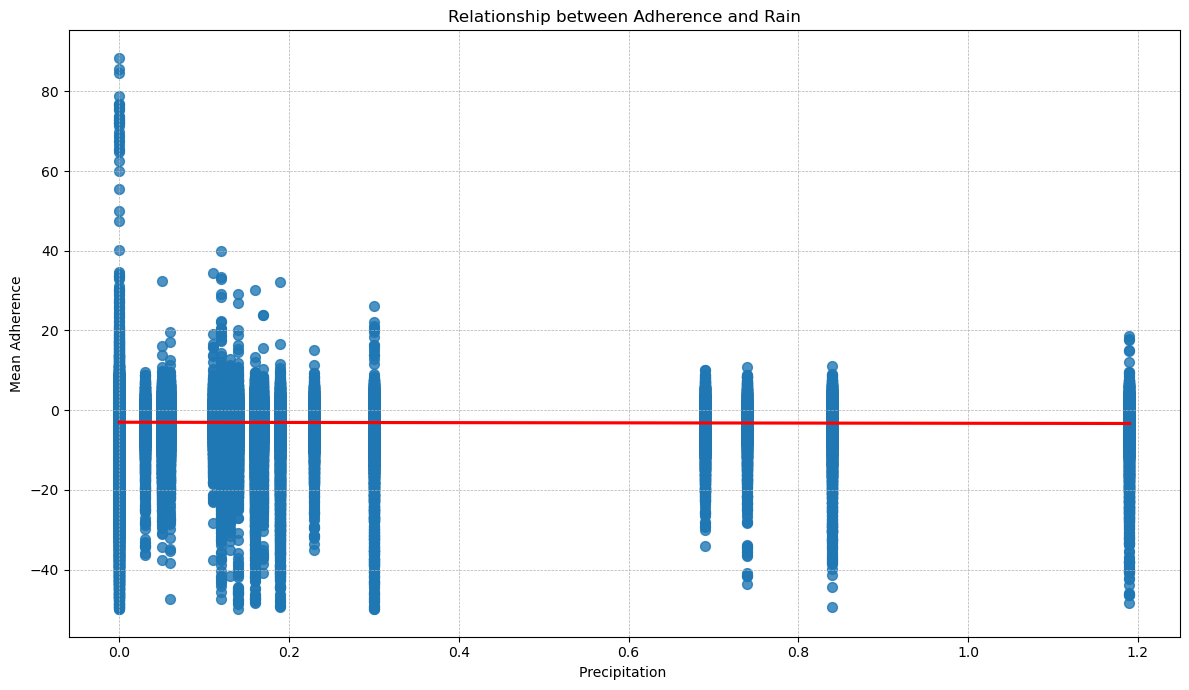

In [65]:
plt.figure(figsize=(12, 7))
sns.regplot(x=weather_and_wego_2['PRCP'], y=weather_and_wego_2['ADHERENCE'], scatter_kws={'s':50}, line_kws={'color':'red'}, ci=None)
plt.xlabel('Precipitation ')
plt.ylabel('Mean Adherence')
plt.title('Relationship between Adherence and Rain')
plt.grid(True, which='both', linestyle='--', linewidth=0.5)
plt.tight_layout()
plt.show()

In [66]:
#There does not appear to be much of a correlation between rain and ADHERENCE
pearson_score = weather_and_wego_2['ADHERENCE'].corr(weather_and_wego_2['PRCP'])
kendall_score = weather_and_wego_2['ADHERENCE'].corr(weather_and_wego_2['PRCP'], method='kendall') # Kendall's tau r
#Because there are large outliers, (from the kurtosis number, pearsons vs. kendall are significantly different. Use Kendall)

print(f"The Pearson Correlation is{pearson_score}")
print(f"The Kendall Correlation is{kendall_score}")

The Pearson Correlation is-0.011919098723920218
The Kendall Correlation is0.002569733806712983


In [ ]:
Fitting a general linear model does not generate much of response.  P value is high, but R^2 is 0.  
From the graph above, it does appear that rain days do affect positive ADHERENCE values somewhat.  
There does not appear to be much of a correlation between rain and ADHERENCE